In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
df_orig=pd.read_csv(r"C:\Users\Ezhil\OneDrive\Desktop\python pro\Copper_Set.xlsx - Result 1.csv")

In [6]:
df=df_orig.copy()

In [7]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [8]:
print(df.dtypes)
print(df.shape)
print(df.isnull().sum())

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object
(181673, 14)
id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64


In [9]:
for i in list(df.columns):
    print(f"{i} : {df[i].nunique()}")

id : 181671
item_date : 252
quantity tons : 181673
customer : 1169
country : 17
status : 9
item type : 7
application : 30
thickness : 594
width : 1386
material_ref : 16563
product_ref : 33
delivery date : 28
selling_price : 9795


In [10]:
# convert the data type from object to numeric

df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['item_date_1'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['delivery date_1'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df.head(3)


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,item_date_1,delivery date_1
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33,2021-04-01,2021-01-01


In [11]:
print(df.dtypes)

id                  object
item_date          float64
quantity tons      float64
customer           float64
country            float64
status              object
item type           object
application        float64
thickness          float64
width              float64
material_ref        object
product_ref          int64
delivery date      float64
selling_price      float64
item_date_1         object
delivery date_1     object
dtype: object


In [12]:
# checking null values
df.isnull().sum()

id                     2
item_date              1
quantity tons          1
customer               1
country               28
status                 2
item type              0
application           24
thickness              1
width                  0
material_ref       77919
product_ref            0
delivery date          1
selling_price          1
item_date_1            3
delivery date_1        3
dtype: int64

In [13]:
#drop unwanted column
df.drop(columns=['id'], inplace=True)

In [14]:
#material_ref which starts with ‘00000’ value which should be converted into numpy nan

df['material_ref'] = df['material_ref'].apply(lambda x: np.nan if str(x).startswith('00000') else x)

#we convert to nan for below 0 values of quantity and selling price.
df['quantity tons'] = df['quantity tons'].apply(lambda x: np.nan if x<=0 else x)
df['selling_price'] = df['selling_price'].apply(lambda x: np.nan if x<=0 else x)
df.head(3)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,item_date_1,delivery date_1
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33,2021-04-01,2021-01-01


In [15]:
# Handling null values using median and mode

# object datatype using mode
df['item_date'].fillna(df['item_date'].mode().iloc[0], inplace=True)
df['item_date_1'].fillna(df['item_date_1'].mode().iloc[0], inplace=True)
df['status'].fillna(df['status'].mode().iloc[0], inplace=True)
df['delivery date'].fillna(df['delivery date'].mode().iloc[0], inplace=True)
df['delivery date_1'].fillna(df['delivery date_1'].mode().iloc[0], inplace=True)

#numerical datatype using median
df['quantity tons'].fillna(df['quantity tons'].median(), inplace=True)
df['customer'].fillna(df['customer'].median(), inplace=True)
df['country'].fillna(df['country'].median(), inplace=True)
df['application'].fillna(df['application'].median(), inplace=True)
df['thickness'].fillna(df['thickness'].median(), inplace=True)
df['selling_price'].fillna(df['selling_price'].median(), inplace=True)

In [16]:
df.isnull().sum()


item_date               0
quantity tons           0
customer                0
country                 0
status                  0
item type               0
application             0
thickness               0
width                   0
material_ref       100645
product_ref             0
delivery date           0
selling_price           0
item_date_1             0
delivery date_1         0
dtype: int64

In [17]:

#drop high null value column
df.drop(columns=['material_ref'], inplace=True)

In [18]:

df.isnull().sum()


item_date          0
quantity tons      0
customer           0
country            0
status             0
item type          0
application        0
thickness          0
width              0
product_ref        0
delivery date      0
selling_price      0
item_date_1        0
delivery date_1    0
dtype: int64

In [19]:
print(df['item type'].unique())
print(df['status'].unique())

['W' 'WI' 'S' 'Others' 'PL' 'IPL' 'SLAWR']
['Won' 'Draft' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful'
 'Revised' 'Offered' 'Offerable']


In [20]:
#convert this unique values as catagorical into numeric using manual encoder and ordinal encoder
df['status'] = df['status'].map({'Lost':0, 'Won':1, 'Draft':2, 'To be approved':3, 'Not lost for AM':4,
                                 'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})
df['item type'] = OrdinalEncoder().fit_transform(df[['item type']])

In [21]:
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1
0,20210401.0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,20210401.0,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,1,5.0,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01
181669,20200702.0,208.086469,30200854.0,25.0,1,5.0,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01
181670,20200702.0,4.235594,30200854.0,25.0,1,5.0,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01
181671,20200702.0,30.365013,30200854.0,25.0,1,5.0,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01


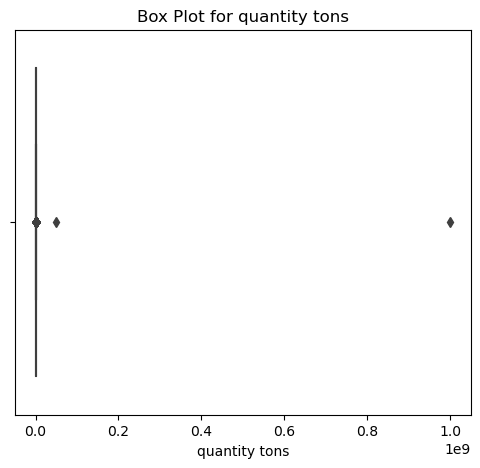

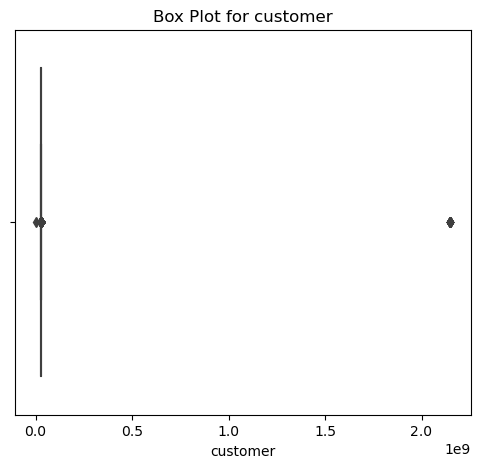

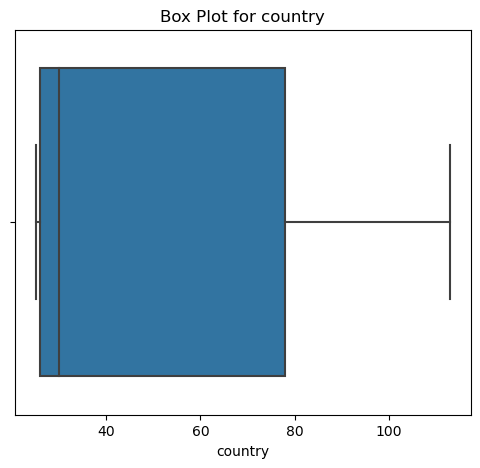

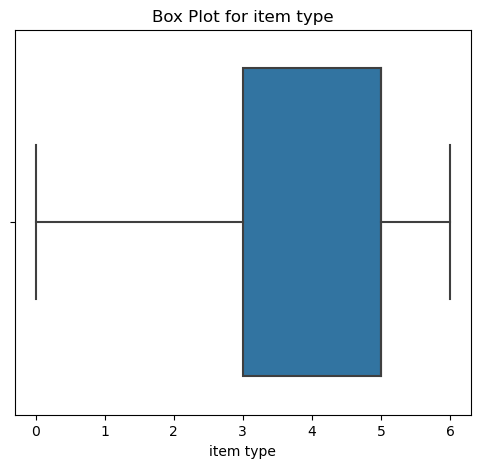

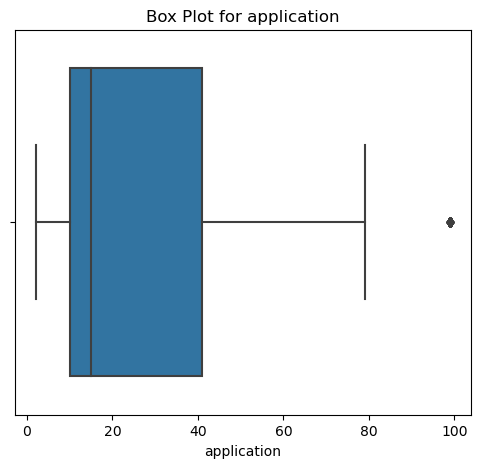

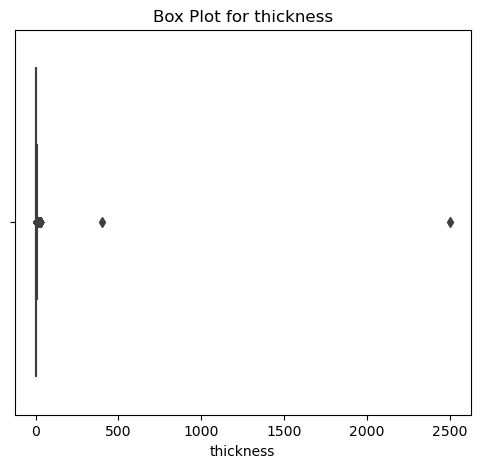

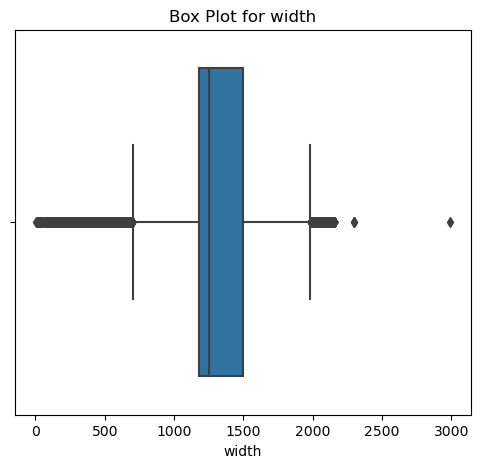

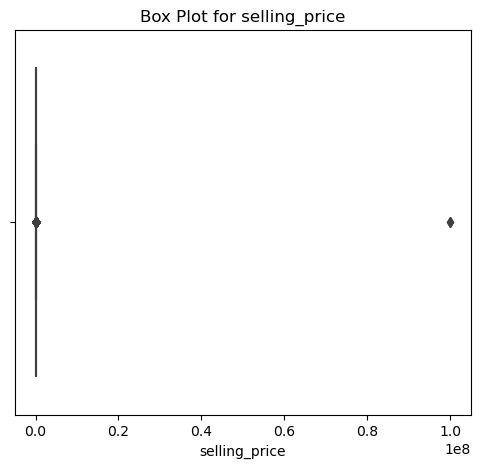

In [22]:
#finding outliers using box plot with skewed data

def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')
for i in ['quantity tons', 'customer', 'country', 'item type', 'application', 'thickness', 'width', 'selling_price']:
    plot(df, i)

In [23]:
#quantity tons, thickness and selling price data are skewd
#using the log transformation method to handle the skewness

df1 = df.copy()
df1['quantity tons_log'] = np.log(df1['quantity tons'])
df1['thickness_log'] = np.log(df1['thickness'])
df1['selling_price_log'] = np.log(df1['selling_price'])
df1.head(3)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log
0,20210401.0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,20210401.0,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,20210401.0,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211


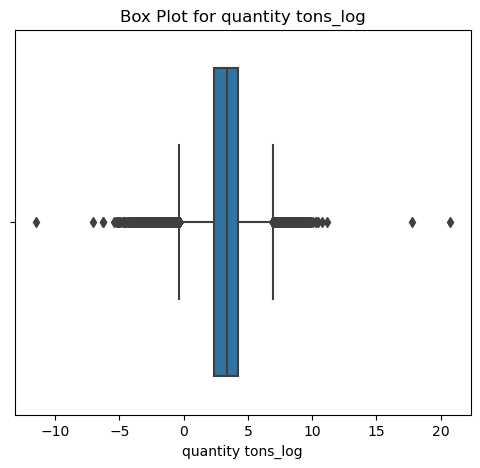

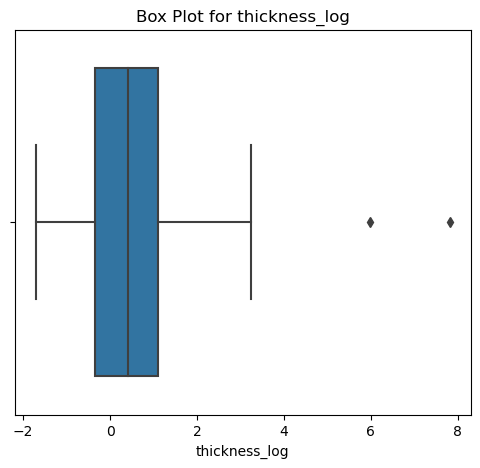

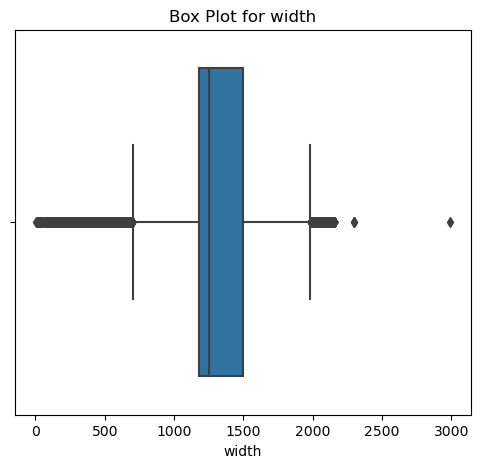

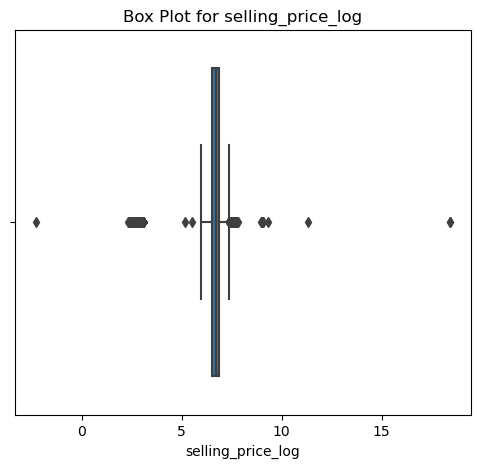

In [24]:
for i in ['quantity tons_log', 'thickness_log', 'width', 'selling_price_log']:
    plot(df1, i)

In [25]:
df2=df1.copy()
df2

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log
0,20210401.0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,20210401.0,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,20210401.0,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,20210401.0,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,1,5.0,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816
181669,20200702.0,208.086469,30200854.0,25.0,1,5.0,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426
181670,20200702.0,4.235594,30200854.0,25.0,1,5.0,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105
181671,20200702.0,30.365013,30200854.0,25.0,1,5.0,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01,3.413291,-0.162519,6.398595


In [26]:
#here we see outliers so we remove that outliers using iqr method

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    up_th = df[column].quantile(0.75) + (1.5*iqr)
    lo_th = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lo_th, up_th)
outlier(df2, 'quantity tons_log')
outlier(df2, 'thickness_log')
outlier(df2, 'selling_price_log')
outlier(df2, 'width')
df2

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log
0,20210401.0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,20210401.0,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,20210401.0,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,20210401.0,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,1980.0,640665,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,1,5.0,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816
181669,20200702.0,208.086469,30200854.0,25.0,1,5.0,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426
181670,20200702.0,4.235594,30200854.0,25.0,1,5.0,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105
181671,20200702.0,30.365013,30200854.0,25.0,1,5.0,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01,3.413291,-0.162519,6.398595


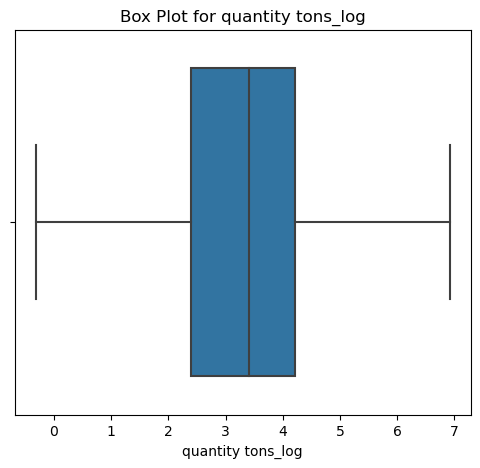

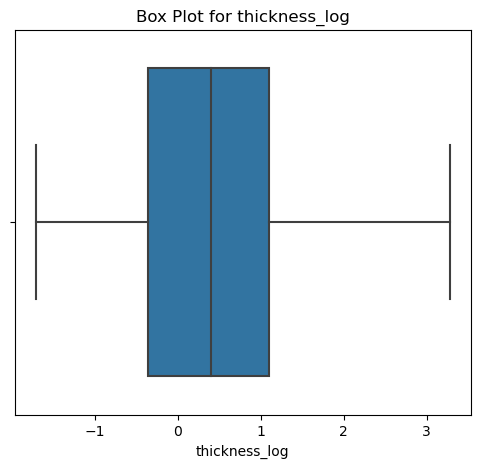

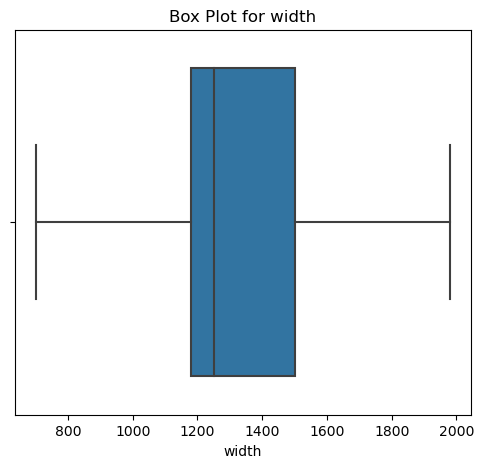

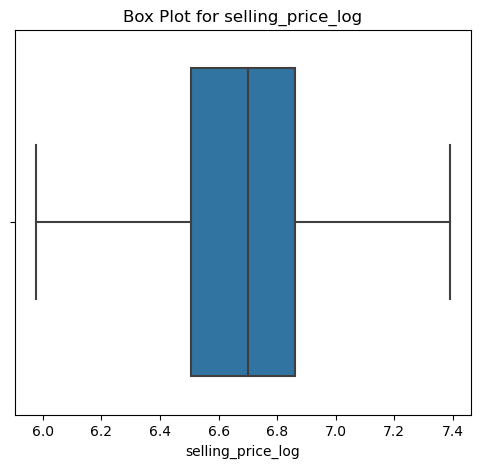

In [27]:
for i in ['quantity tons_log', 'thickness_log', 'width', 'selling_price_log']:
    plot(df2, i)

In [28]:
# after taking logs of the columns, drop the correspondinng existing columns
df3 = df2.drop(columns=['quantity tons', 'thickness', 'selling_price'])
df3

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,20210401.0,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816
181669,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426
181670,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105
181671,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,-0.162519,6.398595


In [29]:

# check the data types
df3.dtypes

item_date            float64
customer             float64
country              float64
status                 int64
item type            float64
application          float64
width                float64
product_ref            int64
delivery date        float64
item_date_1           object
delivery date_1       object
quantity tons_log    float64
thickness_log        float64
selling_price_log    float64
dtype: object

In [30]:
df4=df3.copy()
df4

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,20210401.0,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816
181669,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426
181670,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105
181671,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,-0.162519,6.398595


In [31]:
#treat the delivery date values with date difference
# convert the data type using pandas
df4['item_date_1'] = pd.to_datetime(df4['item_date_1'])
df4['delivery date_1'] = pd.to_datetime(df4['delivery date_1'])

df4['Date_difference'] = (df4['delivery date_1'] - df4['item_date_1']).dt.days
df4.head()

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log,Date_difference
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,6.749931,91
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684,0
2,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211,-90
3,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790,-90
4,20210401.0,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842,-31


In [32]:
# split the day, month, and year from 'item_date' column and add dataframe 
#This data need for prediction
df4['item_day'] = df4['item_date_1'].dt.day
df4['item_month'] = df4['item_date_1'].dt.month
df4['item_year'] = df4['item_date_1'].dt.year
df4

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log,Date_difference,item_day,item_month,item_year
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,6.749931,91,1,4,2021
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684,0,1,4,2021
2,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211,-90,1,4,2021
3,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790,-90,1,4,2021
4,20210401.0,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842,-31,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816,-1,2,7,2020
181669,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426,-1,2,7,2020
181670,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105,-1,2,7,2020
181671,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,-0.162519,6.398595,-1,2,7,2020


In [33]:
# split the non-negative value of 'Date_difference' column in separate dataframe
df_n1 = df4[df4['Date_difference']>=0]

# after split, the index values are unordered. so need to reset the index to ascending order from 0
df_n1 = df_n1.reset_index(drop=True)
df_n1

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log,Date_difference,item_day,item_month,item_year
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,6.749931,91,1,4,2021
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684,0,1,4,2021
2,20210401.0,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,20210401.0,2021-04-01,2021-04-01,5.419608,0.405465,6.890609,0,1,4,2021
3,20210401.0,30209509.0,30.0,2,5.0,41.0,1125.0,611993,20210701.0,2021-04-01,2021-07-01,1.259203,-0.967584,5.975038,91,1,4,2021
4,20210401.0,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,20210701.0,2021-04-01,2021-07-01,4.235147,-0.510826,7.217443,91,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165560,20200702.0,30227718.0,25.0,0,3.0,15.0,1980.0,640665,20200801.0,2020-07-02,2020-08-01,3.472467,1.791759,6.313548,30,2,7,2020
165561,20200702.0,30161559.0,30.0,0,3.0,10.0,1525.0,640665,20200801.0,2020-07-02,2020-08-01,4.196171,1.348073,6.126869,30,2,7,2020
165562,20200702.0,30161559.0,30.0,0,3.0,10.0,1525.0,640665,20200801.0,2020-07-02,2020-08-01,4.156686,1.766442,6.124683,30,2,7,2020
165563,20200702.0,30161559.0,30.0,0,3.0,10.0,1500.0,640665,20200801.0,2020-07-02,2020-08-01,4.025862,2.060514,6.126869,30,2,7,2020


In [34]:
# split the negative value of 'Date_difference' column in another dataframe
df_n2 = df4[df4['Date_difference']<0]

# after split, the index values are unordered. so need to reset the index to ascending order from 0
df_n2 = df_n2.reset_index(drop=True)
df_n2

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log,Date_difference,item_day,item_month,item_year
0,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211,-90,1,4,2021
1,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790,-90,1,4,2021
2,20210401.0,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842,-31,1,4,2021
3,20210401.0,30342192.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-01-01,4.730808,-0.385662,6.836259,-90,1,4,2021
4,20210401.0,30342192.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-01-01,4.736160,-0.597837,6.860664,-90,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16103,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816,-1,2,7,2020
16104,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426,-1,2,7,2020
16105,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105,-1,2,7,2020
16106,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,-0.162519,6.398595,-1,2,7,2020


<Axes: >

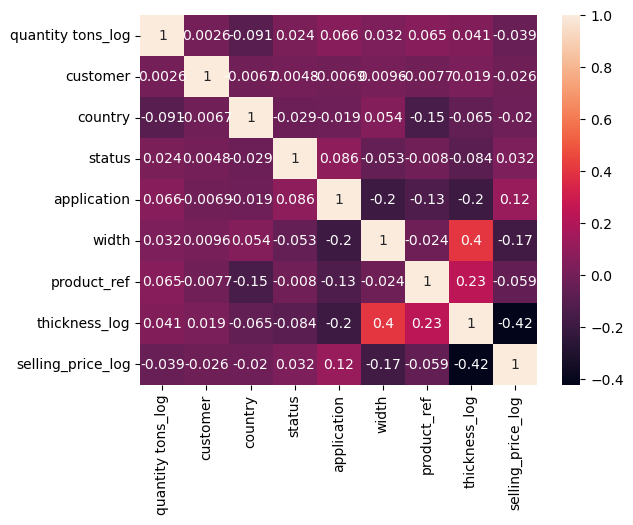

In [35]:
# Need to verify any columns are highly correlated using Heatmap. If any columns correalaion value >= 0.7 (absolute value), drop the columns.

col = ['quantity tons_log','customer','country','status','application','width','product_ref','thickness_log','selling_price_log']
df_heatmap = df4[col].corr()
sns.heatmap(df_heatmap, annot=True)

In [36]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [37]:
df_n1.columns

Index(['item_date', 'customer', 'country', 'status', 'item type',
       'application', 'width', 'product_ref', 'delivery date', 'item_date_1',
       'delivery date_1', 'quantity tons_log', 'thickness_log',
       'selling_price_log', 'Date_difference', 'item_day', 'item_month',
       'item_year'],
      dtype='object')

In [38]:
# find best algorithm for prediction based on R2, mean absolute error, mean squared error and root mean squared error values

def ml_delivery_date(df, algorithm):

    x = df.drop(columns=['item_date_1','delivery date_1','Date_difference'], axis=1)
    y = df['Date_difference']
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

    model = algorithm().fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    metrics = {'Algorithm': str(algorithm).split("'")[1].split(".")[-1],
               'Mean Absolute Error': mae,
               'Mean Squared Error': mse,
               'Root Mean Squared Error': rmse}

    return metrics

In [39]:
print(ml_delivery_date(df_n1, DecisionTreeRegressor))
print(ml_delivery_date(df_n1, RandomForestRegressor))

{'Algorithm': 'DecisionTreeRegressor', 'Mean Absolute Error': 0.0040467490109624615, 'Mean Squared Error': 0.07278108295835473, 'Root Mean Squared Error': 0.2697796933765674}
{'Algorithm': 'RandomForestRegressor', 'Mean Absolute Error': 0.01700721770905687, 'Mean Squared Error': 4.447122326578685, 'Root Mean Squared Error': 2.1088201266534528}


MAE & MSE & RMSE all values are low in random forest regressor so we take that only.

In [40]:
def ml_date_difference():

    x = df_n1.drop(columns=['item_date_1','delivery date_1','Date_difference'], axis=1)
    y = df_n1['Date_difference']
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

    model = RandomForestRegressor().fit(x_train, y_train)

    # predict the 'Date_difference' of df_n2 columns using randomforestregressor
    y_pred_list = []

    for index, row in df_n2.iterrows():
        input_data = row.drop(['item_date_1','delivery date_1','Date_difference'])
        y_pred = model.predict([input_data])
        y_pred_list.append(y_pred[0])

    return y_pred_list

In [41]:
# Machine learning model predict the date difference of (df_f2) datafame
date_difference = ml_date_difference()

In [42]:
print(date_difference)

[14.97, 14.97, 0.0, 14.94, 14.94, 14.93, 14.94, 14.94, 226.59, 0.0, 1.0, 1.0, 3.15, 3.16, 3.13, 3.16, 3.16, 3.14, 3.13, 3.14, 3.15, 3.13, 3.14, 3.15, 3.15, 3.14, 3.14, 3.13, 3.13, 3.13, 3.13, 3.13, 3.15, 3.15, 3.15, 3.15, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.11, 3.11, 3.11, 3.11, 3.15, 3.23, 3.14, 3.16, 3.16, 3.16, 3.0, 3.12, 3.16, 3.15, 3.22, 4.27, 4.27, 4.27, 6.0, 6.0, 6.0, 6.35, 6.25, 6.28, 6.28, 6.21, 6.37, 6.42, 6.32, 6.3, 6.33, 6.36, 8.0, 8.0, 8.0, 6.28, 6.28, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 6.65, 6.64, 6.69, 6.65, 6.66, 6.63, 6.68, 6.62, 6.62, 6.62, 6.66, 6.67, 6.63, 6.68, 6.62, 6.67, 9.0, 9.0, 9.0, 9.0, 9.0, 6.57, 9.0, 0.69, 0.69, 0.69, 0.69, 6.84, 6.84, 6.84, 6.86, 10.0, 10.0, 0.69, 9.12, 13.0, 9.15, 9.12, 8.98, 13.0, 13.0, 13.0, 13.0, 13.0, 9.18, 9.18, 9.05, 9.06, 14.0, 9.03, 9.08, 9.05, 9.03, 9.05, 9.04, 9.02, 14.0, 9.03, 9.05, 14.0, 11.04, 11.15, 11.12, 11.13, 11.11, 11.0, 11.0, 0.69, 11.06, 0.69, 11.55, 0.69, 11.58, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.

In [43]:

# convert float values into integer using list comprehension method
date_difference1 = [int(round(i,0)) for i in date_difference]
# add 'Date_difference' column in the dataframe
df_n2['Date_difference'] = pd.DataFrame(date_difference1)
df_n2

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log,Date_difference,item_day,item_month,item_year
0,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211,15,1,4,2021
1,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790,15,1,4,2021
2,20210401.0,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842,0,1,4,2021
3,20210401.0,30342192.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-01-01,4.730808,-0.385662,6.836259,15,1,4,2021
4,20210401.0,30342192.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-01-01,4.736160,-0.597837,6.860664,15,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16103,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816,30,2,7,2020
16104,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426,30,2,7,2020
16105,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105,30,2,7,2020
16106,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,-0.162519,6.398595,30,2,7,2020


In [44]:
# calculate delivery date (item_date + Date_difference = delivery_date)

def find_delivery_date(item_date, date_difference):

    result_date = item_date + timedelta(days=date_difference)

    delivery_date = result_date.strftime("%Y-%m-%d")

    return delivery_date

In [45]:
# find out the delivery date and add to dataframe

df_n2['item_date_1'] = pd.to_datetime(df_n2['item_date_1'])
df_n2['delivery date_1'] = df_n2.apply(lambda x: find_delivery_date(x['item_date_1'], x['Date_difference']), axis=1)
df_n2

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log,Date_difference,item_day,item_month,item_year
0,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-04-16,5.956169,-0.967584,6.468211,15,1,4,2021
1,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-04-16,5.310301,0.832909,6.643790,15,1,4,2021
2,20210401.0,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-04-01,6.666354,1.386294,6.357842,0,1,4,2021
3,20210401.0,30342192.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-04-16,4.730808,-0.385662,6.836259,15,1,4,2021
4,20210401.0,30342192.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-04-16,4.736160,-0.597837,6.860664,15,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16103,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-08-01,4.629691,-0.040822,6.381816,30,2,7,2020
16104,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-08-01,5.337954,-0.051293,6.378426,30,2,7,2020
16105,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,1.443523,-0.342490,6.428105,30,2,7,2020
16106,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,3.413291,-0.162519,6.398595,30,2,7,2020


In [46]:
# Finally concatinate the both dataframe into single dataframe
df_final = pd.concat([df_n1,df_n2], axis=0, ignore_index=True)
df_final

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log,Date_difference,item_day,item_month,item_year
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01 00:00:00,3.991779,0.693147,6.749931,91,1,4,2021
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01 00:00:00,6.643822,-0.223144,6.953684,0,1,4,2021
2,20210401.0,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,20210401.0,2021-04-01,2021-04-01 00:00:00,5.419608,0.405465,6.890609,0,1,4,2021
3,20210401.0,30209509.0,30.0,2,5.0,41.0,1125.0,611993,20210701.0,2021-04-01,2021-07-01 00:00:00,1.259203,-0.967584,5.975038,91,1,4,2021
4,20210401.0,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,20210701.0,2021-04-01,2021-07-01 00:00:00,4.235147,-0.510826,7.217443,91,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-08-01,4.629691,-0.040822,6.381816,30,2,7,2020
181669,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-08-01,5.337954,-0.051293,6.378426,30,2,7,2020
181670,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,1.443523,-0.342490,6.428105,30,2,7,2020
181671,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,3.413291,-0.162519,6.398595,30,2,7,2020


In [47]:
# split the day, month, and year from 'delivery_date_1' 
df_final['delivery date_1'] = pd.to_datetime(df_final['delivery date_1'])

df_final['delivery_date_day'] = df_final['delivery date_1'].dt.day
df_final['delivery_date_month'] = df_final['delivery date_1'].dt.month
df_final['delivery_date_year'] = df_final['delivery date_1'].dt.year
df_final.columns

Index(['item_date', 'customer', 'country', 'status', 'item type',
       'application', 'width', 'product_ref', 'delivery date', 'item_date_1',
       'delivery date_1', 'quantity tons_log', 'thickness_log',
       'selling_price_log', 'Date_difference', 'item_day', 'item_month',
       'item_year', 'delivery_date_day', 'delivery_date_month',
       'delivery_date_year'],
      dtype='object')

In [48]:
# finally drop the unwanted columns [item_date, delivery_date and date_difference]
df_final.drop(columns=['item_date','delivery date','item_date_1','delivery date_1','Date_difference'], inplace=True)
df_final

,customer,country,status,item type,application,width,product_ref,quantity tons_log,thickness_log,selling_price_log,item_day,item_month,item_year,delivery_date_day,delivery_date_month,delivery_date_year
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,0.693147,6.749931,1,4,2021,1,7,2021
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,-0.223144,6.953684,1,4,2021,1,4,2021
2,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,5.419608,0.405465,6.890609,1,4,2021,1,4,2021
3,30209509.0,30.0,2,5.0,41.0,1125.0,611993,1.259203,-0.967584,5.975038,1,4,2021,1,7,2021
4,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,4.235147,-0.510826,7.217443,1,4,2021,1,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,4.629691,-0.040822,6.381816,2,7,2020,1,8,2020
181669,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,5.337954,-0.051293,6.378426,2,7,2020,1,8,2020
181670,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,1.443523,-0.342490,6.428105,2,7,2020,1,8,2020
181671,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,3.413291,-0.162519,6.398595,2,7,2020,1,8,2020


In [49]:
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import pickle

In [50]:
df_c = df_final.copy()

In [51]:
df_c = df_final.copy()

In [52]:
# filter the status column values only 1 & 0 rows in a new dataframe ['Won':1 & 'Lost':0]
df_c = df_c[(df_c.status == 1) | (df_c.status == 0)]
df_c

,customer,country,status,item type,application,width,product_ref,quantity tons_log,thickness_log,selling_price_log,item_day,item_month,item_year,delivery_date_day,delivery_date_month,delivery_date_year
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,0.693147,6.749931,1,4,2021,1,7,2021
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,-0.223144,6.953684,1,4,2021,1,4,2021
2,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,5.419608,0.405465,6.890609,1,4,2021,1,4,2021
4,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,4.235147,-0.510826,7.217443,1,4,2021,1,7,2021
5,30202938.0,25.0,1,5.0,41.0,1165.0,1668701718,6.446714,0.405465,6.890609,1,4,2021,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,4.629691,-0.040822,6.381816,2,7,2020,1,8,2020
181669,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,5.337954,-0.051293,6.378426,2,7,2020,1,8,2020
181670,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,1.443523,-0.342490,6.428105,2,7,2020,1,8,2020
181671,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,3.413291,-0.162519,6.398595,2,7,2020,1,8,2020


In [53]:
# check no of rows (records) of each 1 and 0 in dataframe
df_c['status'].value_counts()

status
1    116012
0     34438
Name: count, dtype: int64

In [54]:
# in status feature, the 'Won' and 'Lost' value difference is very high. So we need to oversampling to reduce the difference

x = df_c.drop('status', axis=1)
y = df_c['status']

x_new, y_new = SMOTETomek().fit_resample(x,y)

In [55]:

x.shape, y.shape, x_new.shape, y_new.shape

((150450, 15), (150450,), (229582, 15), (229582,))

In [56]:
# check the accuracy of training and testing using metrics

def ml_classification(x_new,y_new, algorithm):

    x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)
    model = algorithm().fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
    accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

    accuracy_metrics = {'algorithm'    : algorithm.__name__,
                        'accuracy_train': accuracy_train,
                        'accuracy_test' : accuracy_test}

    return accuracy_metrics

In [57]:
print(ml_classification(x_new, y_new, DecisionTreeClassifier))
print(ml_classification(x_new, y_new, RandomForestClassifier))

{'algorithm': 'DecisionTreeClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.96672256462748}
{'algorithm': 'RandomForestClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9829474922142126}


random forest classification is the best one

In [58]:
# passing the parameters in the random forest algorithm and check the accuracy for training and testing

x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)

model = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
accuracy_train, accuracy_test

(0.9891922794217733, 0.9744756843870462)

In [59]:
# predict the status and check the accuracy using metrics

x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)

model = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred = model.predict(x_test)

print(confusion_matrix(y_true=y_test, y_pred=y_pred))
print(classification_report(y_true=y_test, y_pred=y_pred))

[[22875   209]
 [ 1003 21830]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     23084
           1       0.99      0.96      0.97     22833

    accuracy                           0.97     45917
   macro avg       0.97      0.97      0.97     45917
weighted avg       0.97      0.97      0.97     45917



In [60]:
# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)

FP,TP,threshold = roc_curve(y_true=y_test, y_score=y_pred)
auc_curve = auc(x=FP, y=TP)
print(auc_curve)

0.9735092306404158


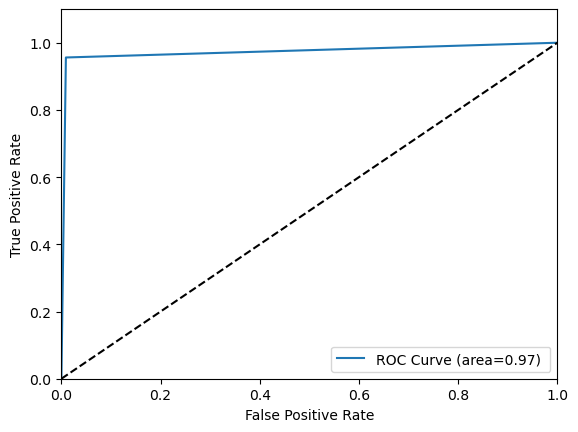

In [61]:
plt.plot(FP, TP, label=f"ROC Curve (area={round(auc_curve, 2)}) ")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [62]:
# will pass the user data manually to check the prediction of status ar our model

def pre(user_data):
    y_p = model.predict(user_data)
    if y_p[0] == 1:
        print('Won')
    else:
        print('Lose')

In [63]:
user_data1 = np.array([[30153963, 30, 6, 28, 952, 628377, 5.9, -0.96, 6.46, 1,4,2021,1,1,2021]])
user_data2 = np.array([[30223403, 78, 5, 10, 1500, 1668701718, 2.2, 0, 7.13, 1,4,2021,1,7,2021]])
pre(user_data1)
pre(user_data2)

Won
Lose


In [64]:
# save the classification model by using pickle

import pickle

with open('classification_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [67]:
# load pickle model to predict the status (like Trained brain).

with open(r'C:\Users\Ezhil\OneDrive\Desktop\copper pro\classification_model.pkl', 'rb') as f:
    model = pickle.load(f)

new_user_data = np.array([[30223403, 78, 5, 10, 1500, 1668701718, 2.2, 0, 7.13, 1,4,2021,1,7,2021]])
pre(new_user_data)

Lose



### regression for predict sales price

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pickle

In [69]:
df_final.columns

Index(['customer', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'quantity tons_log', 'thickness_log',
       'selling_price_log', 'item_day', 'item_month', 'item_year',
       'delivery_date_day', 'delivery_date_month', 'delivery_date_year'],
      dtype='object')

In [70]:
# predict the selling price with hypertuning parameters and calculate the accuracy using metrics

x = df_final.drop(columns=['selling_price_log'], axis=1)
y = df_final['selling_price_log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

metrics_r = {
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

In [71]:
metrics_r

{'Mean Absolute Error': 0.03237020463681764,
 'Mean Squared Error': 0.002865425433021506,
 'Root Mean Squared Error': 0.05352966871765139}

In [72]:
# manually passed the user input and predict the selling price

user_data = np.array([[30202938,25,1,5,41,1210,1668701718,6.6,-0.2,1,4,2021,1,4,2021]])
y_pred = model.predict(user_data)

# using Inverse Log Transformation to convert the value to original scale of the data (exp)
np.exp(y_pred[0])

1017.5505475136856

In [73]:

# save the regression model by using pickle

with open('regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [74]:
# load the pickle model to predict selling price

with open(r"C:\Users\Ezhil\OneDrive\Desktop\copper pro\regression_model.pkl", 'rb') as f:
    model = pickle.load(f)

y_pred = model.predict(np.array([[30202938,25,1,5,41,1210,1668701718,6.6,-0.2,1,4,2021,1,4,2021]]))
np.exp(y_pred[0])

1017.5505475136856

In [75]:
!streamlit run copper_app.py

^C
